In [2]:
# Importing necessary libs : 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Loading our dataset :

data = pd.read_csv('winequality-white (1).csv' , sep = ';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# Preprocessing phase :

In [4]:
# Looking for any missing values :

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Visualization phase :

In [6]:
data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

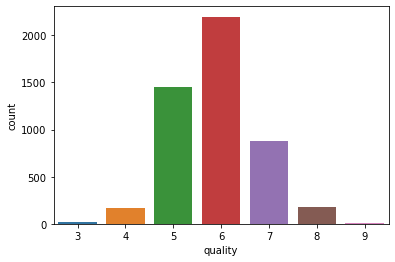

In [7]:
# Interpreting the quality distribution :

sns.countplot(x = 'quality' , data = data)

In [167]:
# Classifying the wine basing on its quality :

def classify_wine_quality(quality):
    if quality < 6:
        return 'poor quality'
    elif quality == 6:
        return 'normal quality'
    else:
        return 'excellent quality'
    
data['quality_classification'] = data['quality'].apply(classify_wine_quality)

<AxesSubplot:xlabel='quality_classification', ylabel='count'>

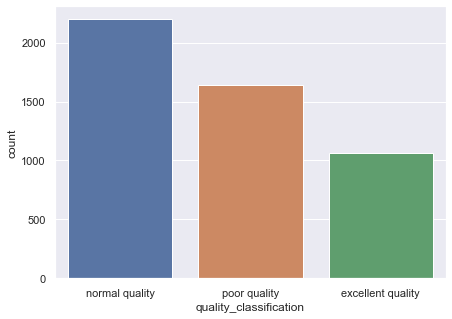

In [168]:
sns.set_style('darkgrid')
sns.set(rc = {'figure.figsize' : (7,5)})
sns.countplot(x = 'quality_classification' , data = data)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

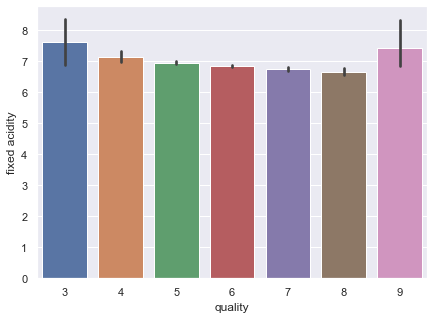

In [169]:
# Fixed acidity :

sns.barplot(x ='quality', y ='fixed acidity', data = data)

<AxesSubplot:xlabel='quality classification', ylabel='alcohol'>

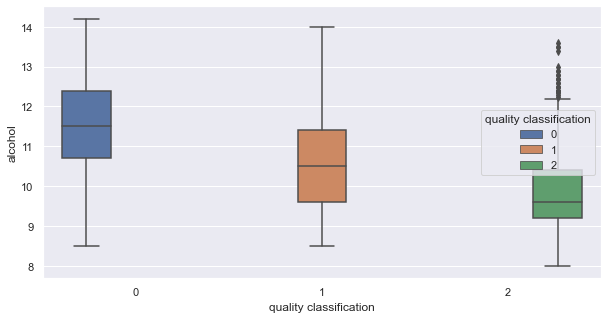

In [170]:
# Alcohol :

sns.set(rc = {'figure.figsize':(10,5)})
sns.boxplot(y = 'alcohol', x = 'quality classification' , hue = 'quality classification' , data = data)

<AxesSubplot:xlabel='quality classification', ylabel='pH'>

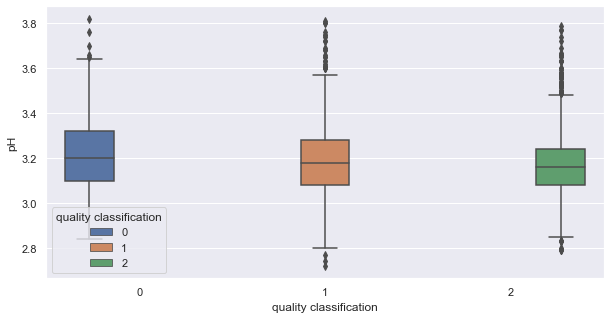

In [171]:
# pH :

sns.boxplot(y = 'pH' , x = 'quality classification' , data = data , hue = 'quality classification') 

<AxesSubplot:xlabel='quality_classification', ylabel='sulphates'>

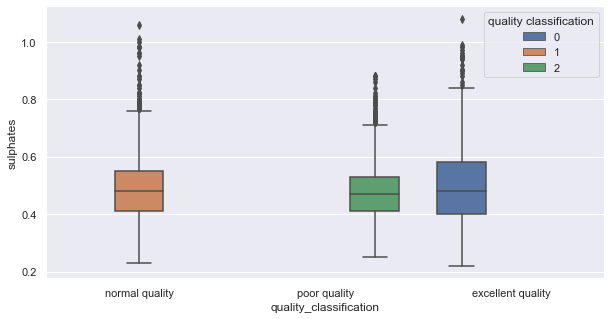

In [172]:
# Sulphates :

sns.boxplot(y = 'sulphates' , x = 'quality_classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality_classification', ylabel='fixed acidity'>

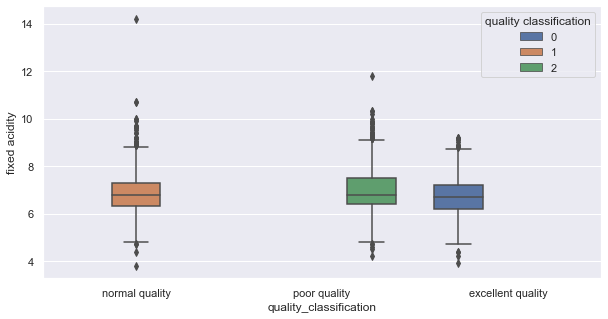

In [173]:
# Fixed acidity :

sns.boxplot(y = 'fixed acidity' , x = 'quality_classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality_classification', ylabel='volatile acidity'>

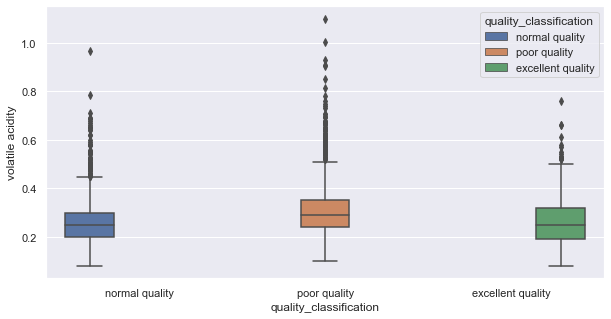

In [174]:
sns.boxplot(y = 'volatile acidity' , x = 'quality_classification' , data = data , hue = 'quality_classification')

<AxesSubplot:xlabel='quality classification', ylabel='citric acid'>

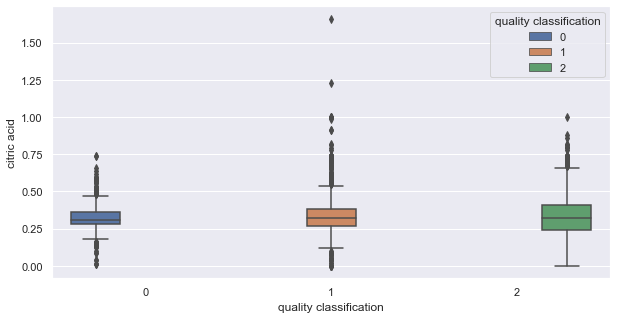

In [175]:
sns.boxplot(y = 'citric acid' , x = 'quality classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality classification', ylabel='residual sugar'>

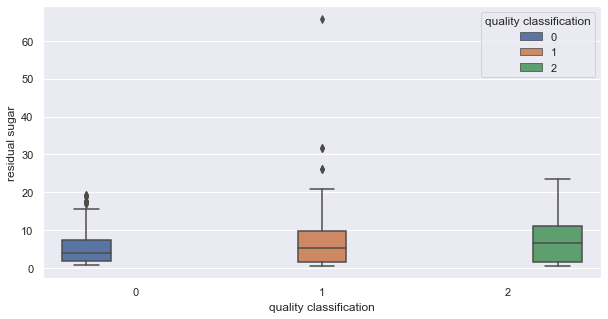

In [176]:
sns.boxplot(y = 'residual sugar' , x = 'quality classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality classification', ylabel='chlorides'>

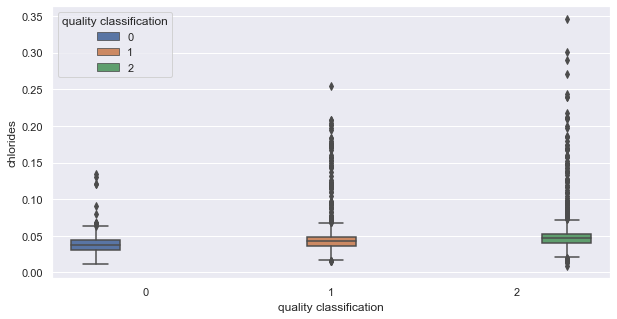

In [177]:
sns.boxplot(y = 'chlorides' , x = 'quality classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality classification', ylabel='free sulfur dioxide'>

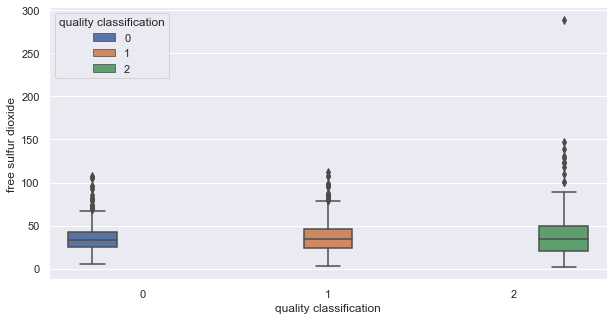

In [178]:
sns.boxplot(y = 'free sulfur dioxide' , x = 'quality classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality classification', ylabel='total sulfur dioxide'>

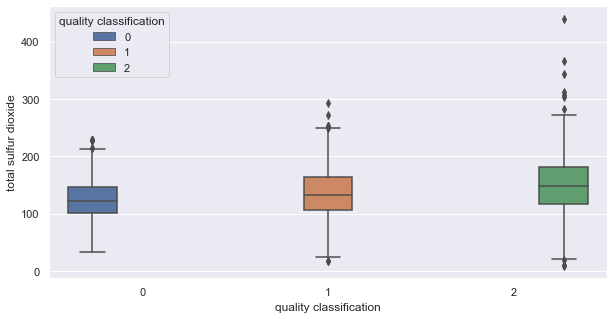

In [179]:
sns.boxplot(y = 'total sulfur dioxide' , x = 'quality classification' , data = data , hue = 'quality classification')

<AxesSubplot:xlabel='quality classification', ylabel='density'>

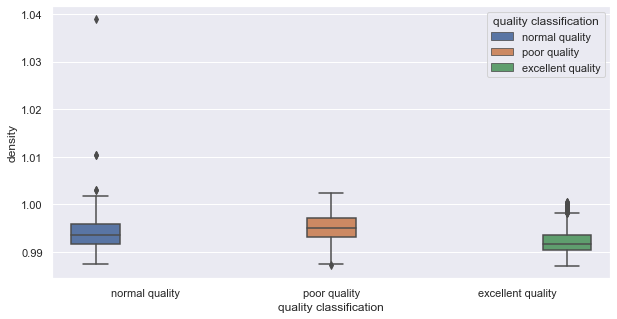

In [21]:
sns.boxplot(y = 'density' , x = 'quality classification' , data = data , hue = 'quality classification')

In [22]:
correlation = data.corr()['quality'].drop('quality')
print(correlation.sort_values(kind = 'quicksort' , ascending = False))

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
LE = LabelEncoder()
data['quality classification'] = LE.fit_transform(data['quality classification'])
data['quality classification'].dtypes
data['quality']

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

#  Machine Learning model :

# 1. Polynomial Regression

In [139]:
from sklearn.preprocessing import PolynomialFeatures 

In [155]:
x = data[['pH' , 'alcohol' , 'sulphates' ]].values
y = data['quality classification'].values
print('x : ' , x)
print('y : ' , y)

x :  [[ 3.    8.8   0.45]
 [ 3.3   9.5   0.49]
 [ 3.26 10.1   0.44]
 ...
 [ 2.99  9.4   0.46]
 [ 3.34 12.8   0.38]
 [ 3.26 11.8   0.32]]
y :  [1 1 1 ... 1 0 1]


In [156]:
lg = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 

In [157]:
x_=poly.fit_transform(x)
print("x before transformation: ", x)
print("x after transformation: ", x_)
lg.fit(x_, y) # Fitting Polynomial Regression to the dataset 

x before transformation:  [[ 3.    8.8   0.45]
 [ 3.3   9.5   0.49]
 [ 3.26 10.1   0.44]
 ...
 [ 2.99  9.4   0.46]
 [ 3.34 12.8   0.38]
 [ 3.26 11.8   0.32]]
x after transformation:  [[1.0000e+00 3.0000e+00 8.8000e+00 ... 7.7440e+01 3.9600e+00 2.0250e-01]
 [1.0000e+00 3.3000e+00 9.5000e+00 ... 9.0250e+01 4.6550e+00 2.4010e-01]
 [1.0000e+00 3.2600e+00 1.0100e+01 ... 1.0201e+02 4.4440e+00 1.9360e-01]
 ...
 [1.0000e+00 2.9900e+00 9.4000e+00 ... 8.8360e+01 4.3240e+00 2.1160e-01]
 [1.0000e+00 3.3400e+00 1.2800e+01 ... 1.6384e+02 4.8640e+00 1.4440e-01]
 [1.0000e+00 3.2600e+00 1.1800e+01 ... 1.3924e+02 3.7760e+00 1.0240e-01]]


LinearRegression()

In [158]:
x_test_=poly.fit_transform(x_test)
lg.predict(x_test_)

array([1.39138594, 1.65398266, 1.12677469, ..., 1.61661492, 1.38328054,
       1.38263406])

In [159]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.4131188487923209
R squared:  0.21872544998750587


# 2. Random Forest Classifier :

In [25]:
# Import the needed scikit learn libraries :

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [26]:
# Divide the dataset into training data and test data :

x_train, x_test, y_train, y_test = train_test_split(data.drop(['quality classification' , 'quality'], axis = 1 ) , data['quality classification'], test_size = 0.40)

In [27]:
# Create a Random Forest Classifier Model :

RFC = RandomForestClassifier(n_estimators = 10)

In [28]:
# Train the Random Forest Classifier Model :

RFC.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [29]:
# Make Prediction :

predictions = RFC.predict(x_test)

In [30]:
# Classification report :

print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       410
           1       0.71      0.63      0.67       977
           2       0.64      0.74      0.69       573

    accuracy                           0.67      1960
   macro avg       0.66      0.68      0.67      1960
weighted avg       0.67      0.67      0.67      1960



In [31]:
# Validate our model using a confusion matrix :

print(confusion_matrix(predictions, y_test))

[[272 117  21]
 [144 615 218]
 [ 16 131 426]]


# 3. Multi-Linear Regression model :

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [92]:
# Specifying x and y :

x = data[['pH' , 'alcohol' , 'sulphates' ]]
y = data['quality classification'].values
print('x : ' , x)
print('y : ' , y)

x :          pH  alcohol  sulphates
0     3.00      8.8       0.45
1     3.30      9.5       0.49
2     3.26     10.1       0.44
3     3.19      9.9       0.40
4     3.19      9.9       0.40
...    ...      ...        ...
4893  3.27     11.2       0.50
4894  3.15      9.6       0.46
4895  2.99      9.4       0.46
4896  3.34     12.8       0.38
4897  3.26     11.8       0.32

[4898 rows x 3 columns]
y :  [1 1 1 ... 1 0 1]


In [93]:
# Splitting the data to test and train sets : 

x_train,x_test,y_train,y_test=train_test_split(x , y , test_size = 0.4 , random_state = 40)

In [94]:
model = LinearRegression()   # build linear regression model
model.fit(x_train , y_train)   # fitting the training data
predicted = model.predict(x_test)   # testing our model’s performance

In [95]:
# Testing our model's performence :

print("MSE = ", mean_squared_error(y_test,predicted))
print("R squared = ", metrics.r2_score(y_test,predicted))

MSE =  0.4131188487923209
R squared =  0.21872544998750587


# 3. K-NN model :

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [120]:
knn=KNeighborsClassifier(n_neighbors = 5) # Build our knn classifier
knn.fit(x_train , y_train) # Training KNN classifier

KNeighborsClassifier()

In [163]:
y_pred=knn.predict(x_test)  # Testing
print('Acuuracy = ', accuracy_score (y_pred , y_test))

Acuuracy =  0.5341836734693878


In [182]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.51
Accuracy for k= 2 is: 0.51
Accuracy for k= 3 is: 0.51
Accuracy for k= 4 is: 0.51
Accuracy for k= 5 is: 0.51
Accuracy for k= 6 is: 0.52
Accuracy for k= 7 is: 0.52
Accuracy for k= 8 is: 0.52
Accuracy for k= 9 is: 0.52
Accuracy for k= 10 is: 0.51
Accuracy for k= 11 is: 0.52
Accuracy for k= 12 is: 0.51
Accuracy for k= 13 is: 0.52
Accuracy for k= 14 is: 0.52
Accuracy for k= 15 is: 0.52
Accuracy for k= 16 is: 0.51
Accuracy for k= 17 is: 0.51
Accuracy for k= 18 is: 0.5
Accuracy for k= 19 is: 0.5
Accuracy for k= 20 is: 0.5
Accuracy for k= 21 is: 0.51
Accuracy for k= 22 is: 0.52
Accuracy for k= 23 is: 0.52
Accuracy for k= 24 is: 0.53
Accuracy for k= 25 is: 0.53
Accuracy for k= 26 is: 0.52
Accuracy for k= 27 is: 0.53
Accuracy for k= 28 is: 0.53
Accuracy for k= 29 is: 0.6


Text(0, 0.5, 'Testing Accuracy')

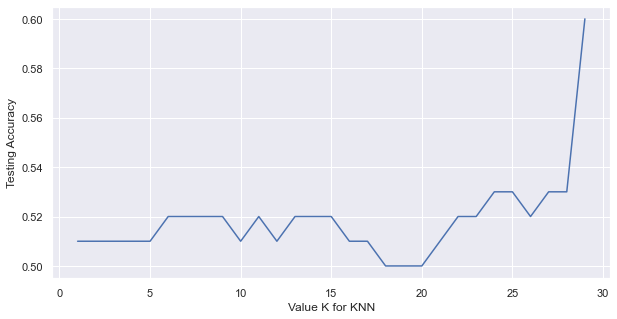

In [184]:
plt.plot(range(1,30) , scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')